# Section 3.3.2 Poisson Regression Epidemic Example

### Scientific question: whether or not the epidemic is spreading un-checked (not simply finding the best model fit)

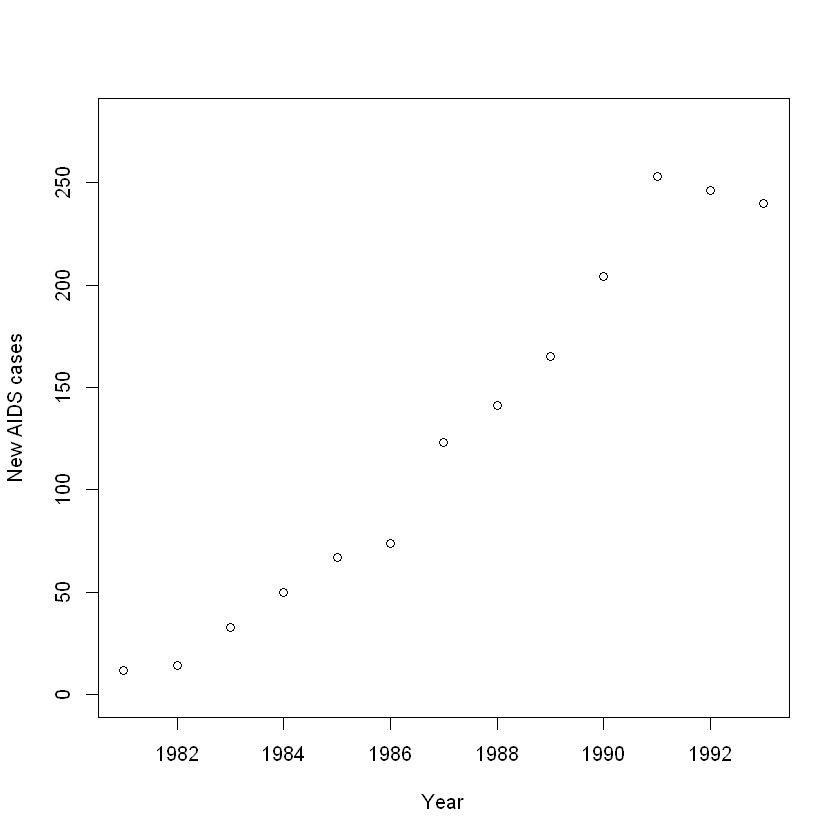

In [8]:
# load and plot the observation data
y <- c(12, 14, 33, 50, 67, 74, 123, 141, 165, 204, 253, 246, 240)
t <- 1:13
plot(t+1980, y, xlab="Year", ylab="New AIDS cases", ylim=c(0, 280))

**The scientific question is whether or not the increase in AIDS is slowing**


Call:  glm(formula = y ~ t, family = poisson)

Coefficients:
(Intercept)            t  
     3.1406       0.2021  

Degrees of Freedom: 12 Total (i.e. Null);  11 Residual
Null Deviance:	    872.2 
Residual Deviance: 80.69 	AIC: 166.4

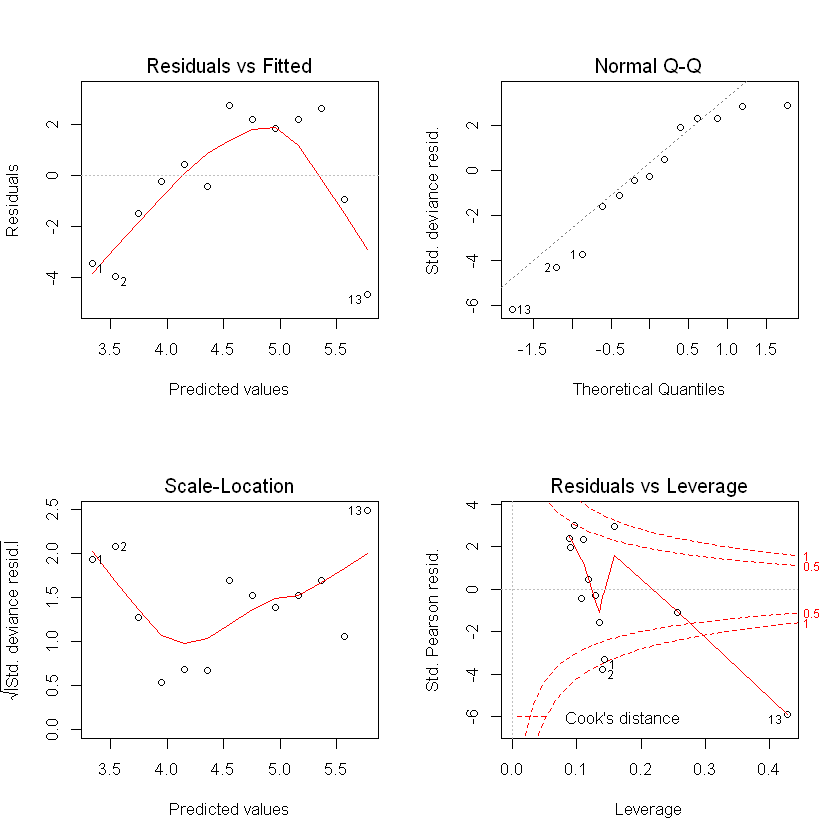

In [9]:
m0 <- glm(y ~ t, poisson)
m0
par(mfrow=c(2, 2))
plot(m0)

**There is a clear patterning in the mean of the residuals plotted against the fitted values, which violates the independence assumption and most likely is a result of omission of an important variable in the model.**

In [10]:
qchisq(0.99, 11)
1-pchisq(80.69, 11)

[1] 24.72497

[1] 1.085243e-12

**The model residual deviance is high for a chi square distribution of 11 df. Also, there is a very small probability that a chi square random variable with df 11 is as large as 80.69.**

**Also, the function increases monotonically with time, so it would be sensible to add a quadratic term.**


Call:
glm(formula = y ~ t + I(t^2), family = poisson)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.45903  -0.64491   0.08927   0.67117   1.54596  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.901459   0.186877  10.175  < 2e-16 ***
t            0.556003   0.045780  12.145  < 2e-16 ***
I(t^2)      -0.021346   0.002659  -8.029 9.82e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 872.2058  on 12  degrees of freedom
Residual deviance:   9.2402  on 10  degrees of freedom
AIC: 96.924

Number of Fisher Scoring iterations: 4


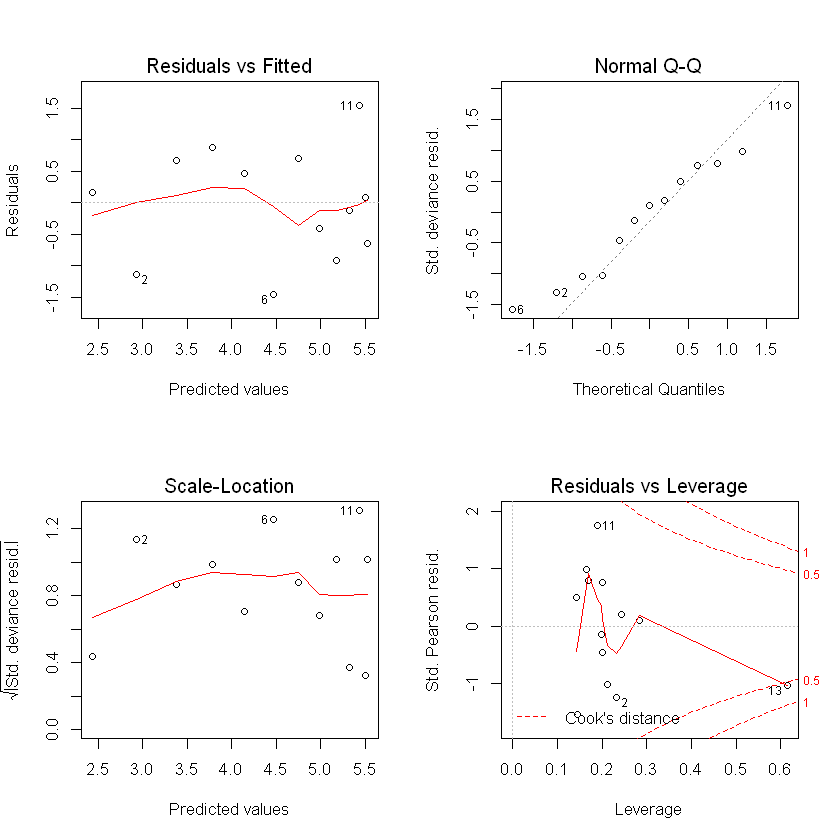

In [11]:
m1 <- glm(y ~ t + I(t^2), poisson)
par(mfrow=c(2, 2))
plot(m1)
summary(m1)

**We can see that the residual plot has improved greatly -- the clear trend in the mean is now gone, the (vertical) spread of the residuals is reasonably even, the influence of the last point is much reduced, and the Q-Q plot is straighter.**

**Additionally, the fuller model summary shows an improved AIC value along with a residual deviance that is much more plausible for a chi square distribution with df 10 because 9.2402 < 24.725. The null hypothesis that beta 1 and beta 2 is = 0 can also be rejected in the second model because of the sufficiently small p-values in the summary table, providing clear evidence that mod1 is preferrable to mod0. The same question can be addressed using the likelihood ratio test below.**

In [12]:
anova(m0, m1, test="Chisq")
anova(m0, m1, test="LR")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
11,80.686486,NA,NA,NA
10,9.240248,1,71.44624,2.849165e-17


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
11,80.686486,NA,NA,NA
10,9.240248,1,71.44624,2.849165e-17


**Because the scale parameter is known in Poisson regression, we set the test to `Chisq`. However, had we not known the scale parameter and it had been estimated, it would be preferrable to set the test to `F`.**

**The conclusion is the same as before: the small p-value indicates that mod0 should be rejected in favor of mod1, that the two models are significantly different.**

### Conclusion

$\beta$1 can be interpreted as the spread of disease at the epidemic start

In [15]:
beta.1 <- summary(m1)$coefficients[2,]
ci <- c(beta.1[1]-1.96*beta.1[2],beta.1[1]+1.96*beta.1[2])
ci ## print 95% CI for beta_1

Estimate  Estimate 
0.4662750 0.6457316

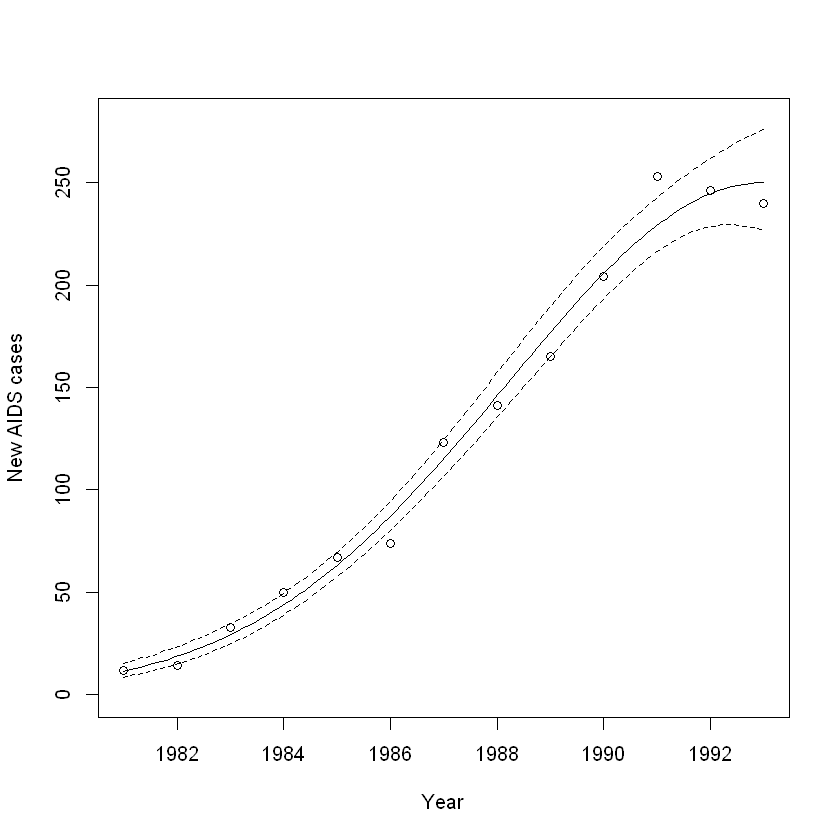

In [16]:
new.t <- seq(1,13,length=100)
fv <- predict(m1,data.frame(t=new.t),se=TRUE)
par(mfrow=c(1,1))
plot(t+1980,y,xlab="Year",ylab="New AIDS cases",ylim=c(0,280))
lines(new.t+1980,exp(fv$fit))
lines(new.t+1980,exp(fv$fit+2*fv$se.fit),lty=2)
lines(new.t+1980,exp(fv$fit-2*fv$se.fit),lty=2)